## 데이터 로드 

In [8]:

import pandas as pd
path = 'D:/Projects/predictSalary/train.csv'
data = pd.read_csv(path)
data.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [4]:
# 결측치, 칼럼, 메모리사용량 등 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
id                26049 non-null int64
age               26049 non-null int64
workclass         26049 non-null object
fnlwgt            26049 non-null int64
education         26049 non-null object
education_num     26049 non-null int64
marital_status    26049 non-null object
occupation        26049 non-null object
relationship      26049 non-null object
race              26049 non-null object
sex               26049 non-null object
capital_gain      26049 non-null int64
capital_loss      26049 non-null int64
hours_per_week    26049 non-null int64
native_country    26049 non-null object
income            26049 non-null object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [5]:
# 수치데이터 요약
data.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


capital_gain, capital_loss에 0.0이 많아보인다

In [6]:
data.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,26049,26049,26049,26049,26049,26049,26049,26049,26049
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,18123,8433,11970,3304,10541,22315,17482,23371,19744


In [7]:
feature_columns = data.columns[:-1].tolist()

In [8]:
feature_columns

['id',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

In [9]:
data['income'] = data['income'].replace('<=50K', 0)
data['income'] = data['income'].replace('>50K', 1)
data['income'].value_counts(normalize=True)

0    0.757956
1    0.242044
Name: income, dtype: float64

## 데이터 시각화 - numeric

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### age - income

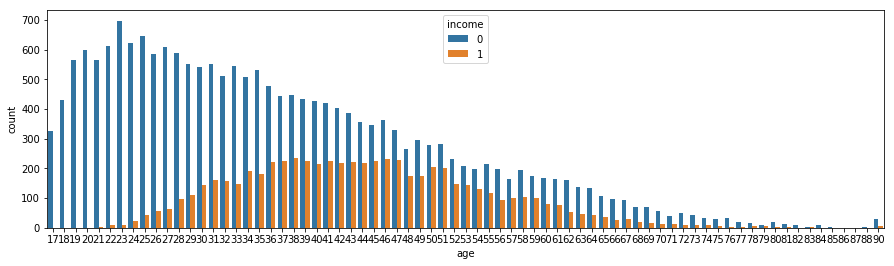

In [11]:

plt.figure(figsize=(15,4))
sns.countplot(data=data, x="age", hue="income")

countplot - categorical 데이터에 사용

### fnlwgt  - income

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=data, x="fnlwgt", hue="income")

In [ ]:
sns.barplot(data=data, x="income", y="fnlwgt")

### education_num - income

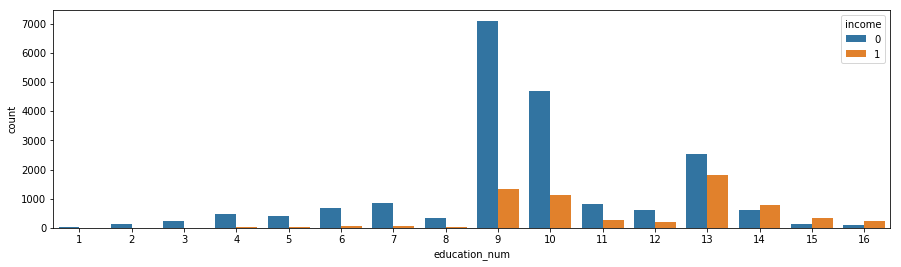

In [31]:
plt.figure(figsize=(15,4))
sns.countplot(data=data, x="education_num", hue="income")

age, education_num는 continuous data로 다뤄야 할듯
edutation_num은 8을 기점으로 많고 적음으로 나타내보자 


In [32]:
data['edu_num_high'] = data['education_num'] > 8
data[['edu_num_high', 'education_num']].head()

,edu_num_high,education_num
0,True,9
1,False,5
2,True,10
3,True,10
4,True,10


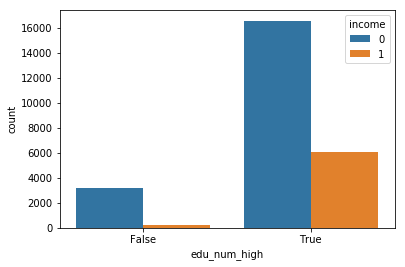

In [33]:
sns.countplot(data=data, x="edu_num_high", hue="income")

교육횟수가 8번 초과일 때 income이 50k 초과인 경우가 많다 

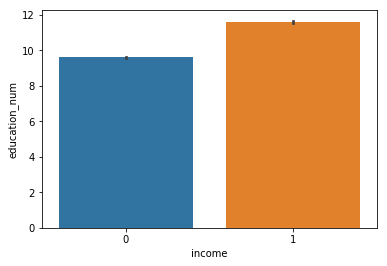

In [34]:
sns.barplot(data=data, x="income", y="education_num")

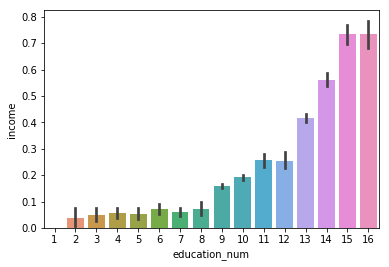

In [35]:
sns.barplot(data=data, x="education_num", y="income")

### hours_per_week - income

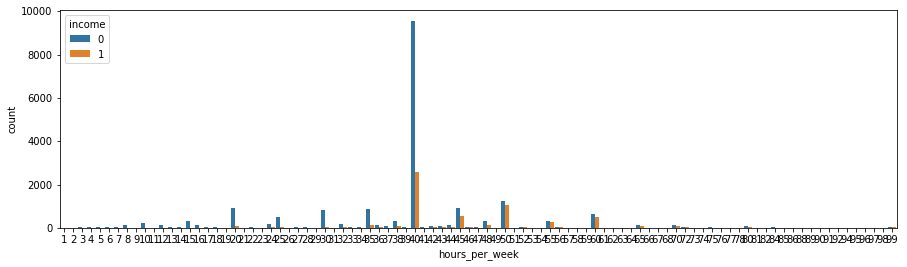

In [28]:
plt.figure(figsize=(15,4))
sns.countplot(data=data, x="hours_per_week", hue="income")

hours_per_week를 범주형으로 보기 

In [29]:
data['hours_per_week_high'] = data['hours_per_week'] > 40
data[['hours_per_week_high', 'hours_per_week']].head()

,hours_per_week_high,hours_per_week
0,True,60
1,False,20
2,False,16
3,False,25
4,False,20


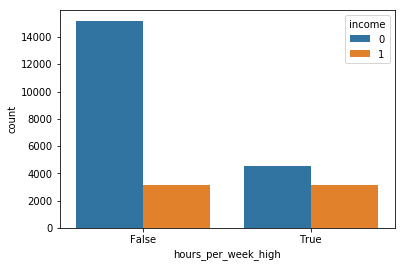

In [30]:
sns.countplot(data=data, x="hours_per_week_high", hue="income")

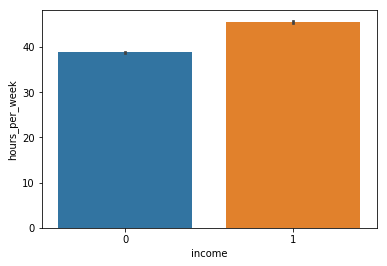

In [26]:
sns.barplot(data=data, x="income", y="hours_per_week")

평균으로 비교해보면 income이 50k이상인 사람들이 hours_per_week, education_num이 조금더 높은편임을 알 수 있음 

 ### education_num - hours_per_week

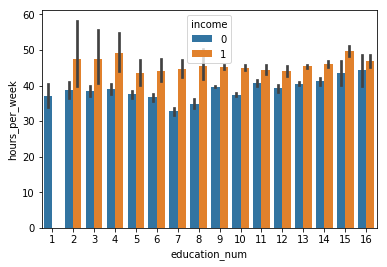

In [25]:
sns.barplot(data=data, x="education_num", y="hours_per_week", hue="income")

x와y의 상관관계가 보이지는 않지만 hours_per_week는 income치 50k이상인 사람들이 대체적으로 더 높다

### capical_gain, capital_loss, income

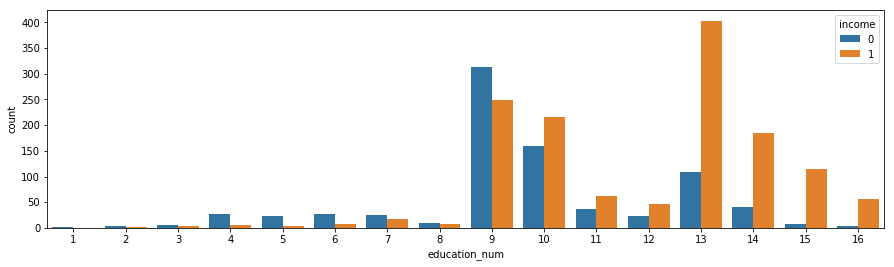

In [12]:
test = data['capital_gain'] > 0
plt.figure(figsize=(15,4))
sns.countplot(data=data[test], x="education_num", hue="income")

In [13]:
len(data[test])

2193

capital_gain이 0초과인 사람들 중에서 education_num과 income 

In [14]:
test2 = data['capital_loss'] > 0
len(data[test2])


1226

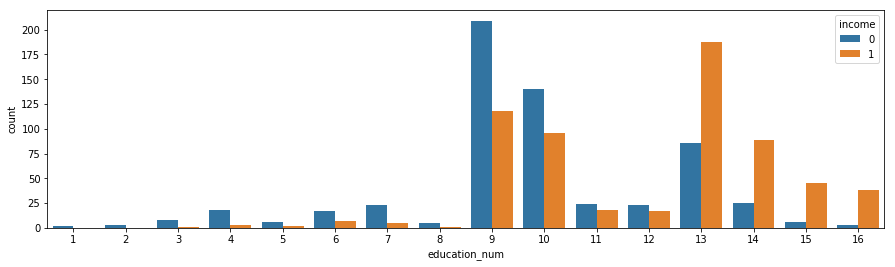

In [15]:
plt.figure(figsize=(15,4))
sns.countplot(data=data[test2], x="education_num", hue="income")

capital_loss이 0초과인 사람들 중에서 education_num과 income 

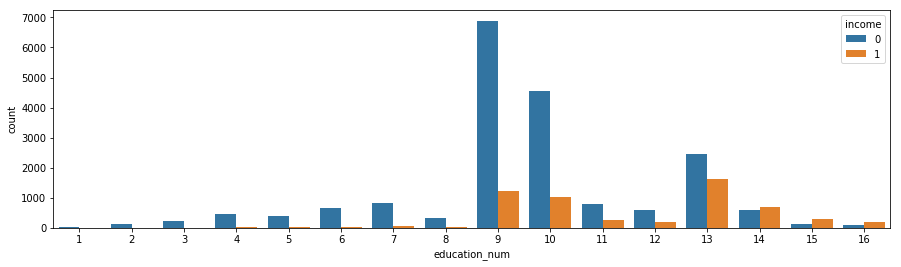

In [16]:
test2 = data['capital_loss'] == 0
plt.figure(figsize=(15,4))
sns.countplot(data=data[test2], x="education_num", hue="income")

capital_loss이 0인 사람들 중에서 education_num과 income 

In [65]:
# data["capital_gain_tt"] = data["capital_gain"] > 0 & data["capital_loss"] > 0
# data["capital_gain_tf"] = data["capital_gain"] > 0 & data["capital_loss"] == 0
# data["capital_gain_ft"] = data["capital_gain"] == 0 & data["capital_loss"] > 0
# data["capital_gain_ff"] = data["capital_gain"] == 0 & data["capital_loss"] == 0
# len(data[data["capital_gain_tt"]])
# len(data[data["capital_gain_tt"]])
# len(data[data["capital_g?ain_tt"]])
# len(data[data["capital_gain_tt"]])
t = data["capital_gain"] > 0
tt = data["capital_loss"] > 0
f = data["capital_gain"] == 0
ff = data["capital_loss"] == 0
print(len(data[t & tt]))
print()
print(len(data[t & ff]))
print(data[t & ff]['income'].value_counts(normalize=True))
print()
print(len(data[f & tt]))
print(data[f & tt]['income'].value_counts(normalize=True))
print()
print(len(data[f & ff]))
print( data[f & ff]['income'].value_counts(normalize=True))

0

2193
1    0.627451
0    0.372549
Name: income, dtype: float64

1226
1    0.512235
0    0.487765
Name: income, dtype: float64

22630
0    0.809943
1    0.190057
Name: income, dtype: float64


각 케이스별 데이터 사이즈와 income 비율   
capital_gain, capital_loss 모두 0인 데이터가 제일많음

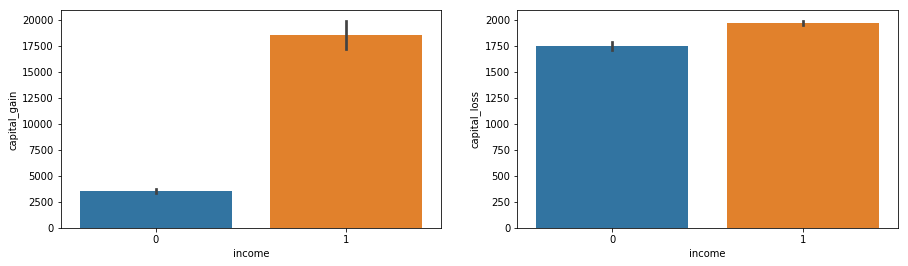

In [44]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,4)

sns.barplot(data=data[t & ff], x="income", y="capital_gain", ax=ax1) # total 2193
# sns.barplot(data=data[t & ff], x="income", y="capital_loss", ax=ax2)
# sns.barplot(data=data[f & tt], x="income", y="capital_gain", ax=ax3)
sns.barplot(data=data[f & tt], x="income", y="capital_loss", ax=ax2) # total 1226
# sns.barplot(data=data[f & ff], x="income", y="capital_gain", ax=ax5)
# sns.barplot(data=data[f & ff], x="income", y="capital_loss", ax=ax6)

capital_gain > 0이고 capital_loss==0인 데이터에서는 income이 1인 계층이 0인 계층보다 평균 capital_gain이 훨씬 높게 나타난다
capital_gain ==0 이고 capital_loss > 0인 데이터에서는 두 계층이 평균 capital_loss가 높게 나왔다

In [67]:
data[f & tt]['income'].value_counts(normalize=True)

1    0.512235
0    0.487765
Name: income, dtype: float64

## 데이터 시각화 - continuous

### fnlwgt-income (final weight)

E:\programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


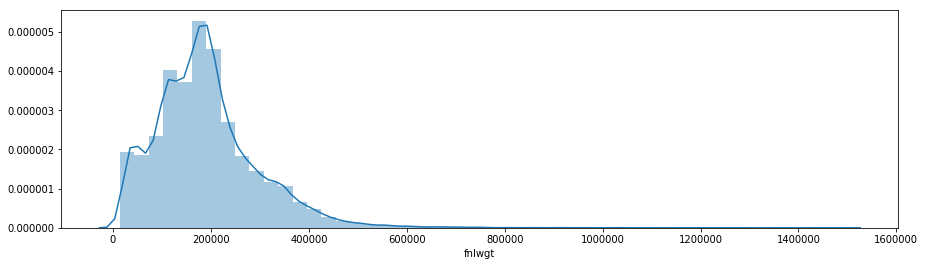

In [70]:
plt.figure(figsize=(15,4))
sns.distplot(data['fnlwgt'])

In [76]:
income_1 = data[data['income'] == 1]
income_0 = data[data['income'] == 0]
income_1.shape, income_0.shape

((6305, 18), (19744, 18))

E:\programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


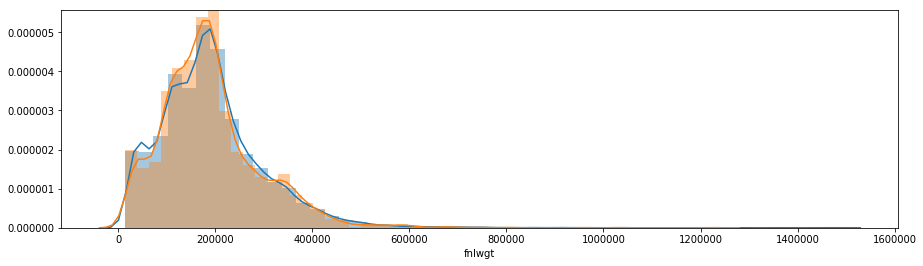

In [79]:
plt.figure(figsize=(15,4))
sns.distplot(income_0['fnlwgt'])
sns.distplot(income_1['fnlwgt'])

income에 따른 두 계층에서 fnlwgt 그래프가 비슷하게 나타난다. 

### age-income

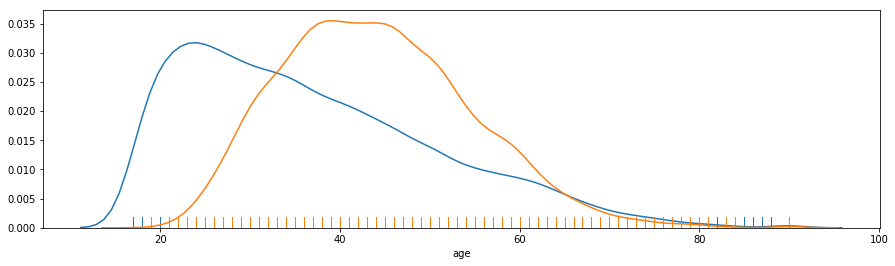

In [83]:
plt.figure(figsize=(15,4))
sns.distplot(income_0['age'], hist=False, rug=True)
sns.distplot(income_1['age'], hist=False, rug=True)

어떤 데이터를 범주형으로 다뤄야 모델이 학습하는데 더 도움이 될때 어떤 값을 기준으로 나눠주어야할지 봐야할 때 distplot 사용 

### education_num-income

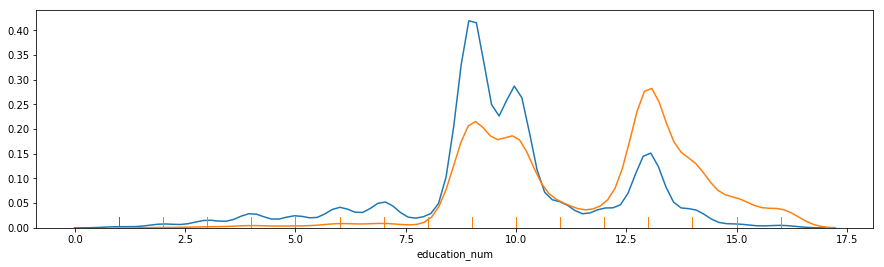

In [85]:
plt.figure(figsize=(15,4))
sns.distplot(income_0['education_num'], hist=False, rug=True)
sns.distplot(income_1['education_num'], hist=False, rug=True)

## hisplot

In [89]:
data['hours_per_week_high'] = data['hours_per_week_high'].astype(int)
data['edu_num_high'] = data['edu_num_high'].astype(int)

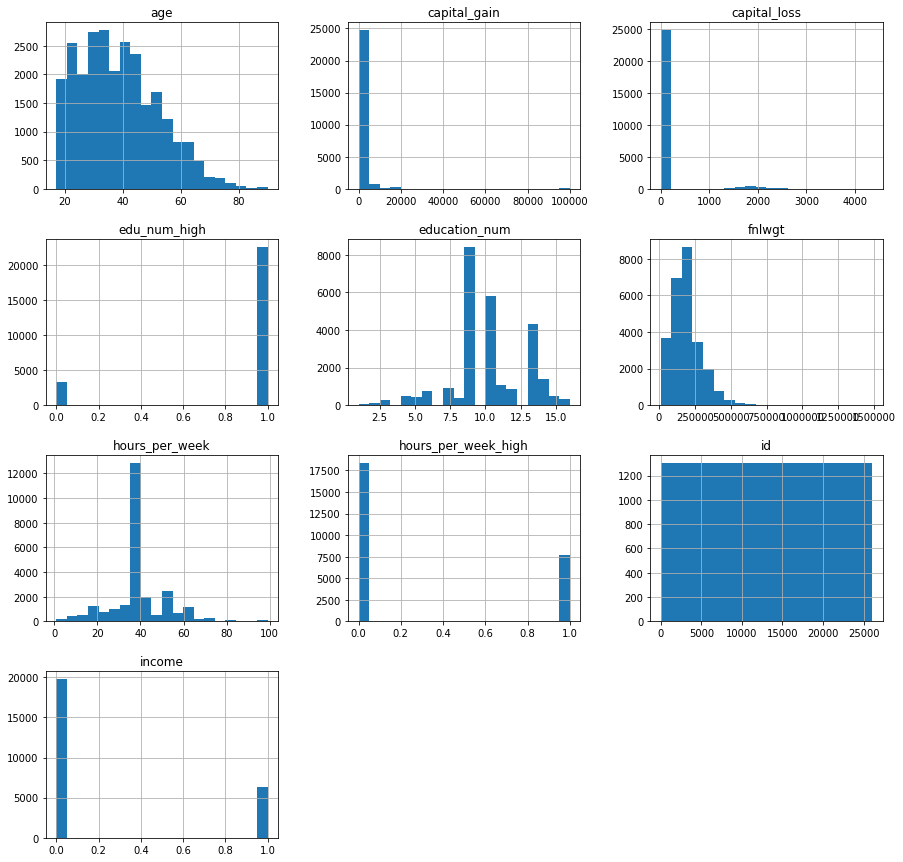

In [91]:
graph = data.hist(figsize=(15, 15), bins=20)

## violinplot

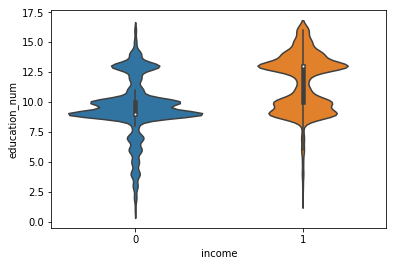

In [104]:
sns.violinplot(data=data, x="income", y="education_num")


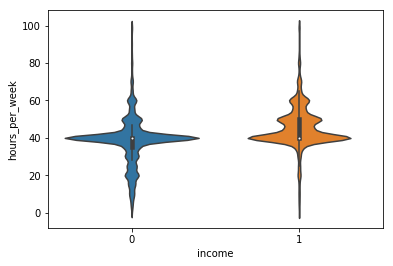

In [106]:
sns.violinplot(data=data, x="income", y="hours_per_week")


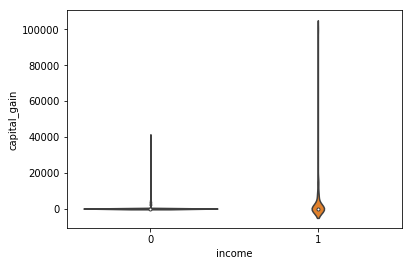

In [108]:
sns.violinplot(data=data, x="income", y="capital_gain")


## inplot

In [109]:
### education_num - hours_per_Week

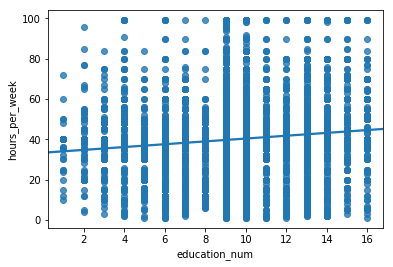

In [124]:
sns.regplot(data=data, x="education_num", y="hours_per_week")

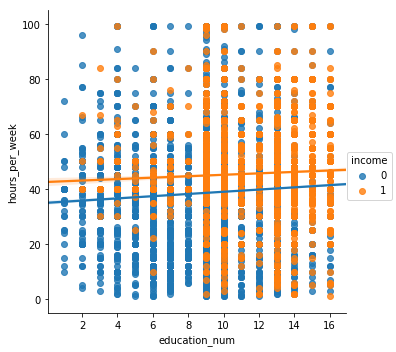

In [113]:
sns.lmplot(data=data, x="education_num", y="hours_per_week", hue="income")

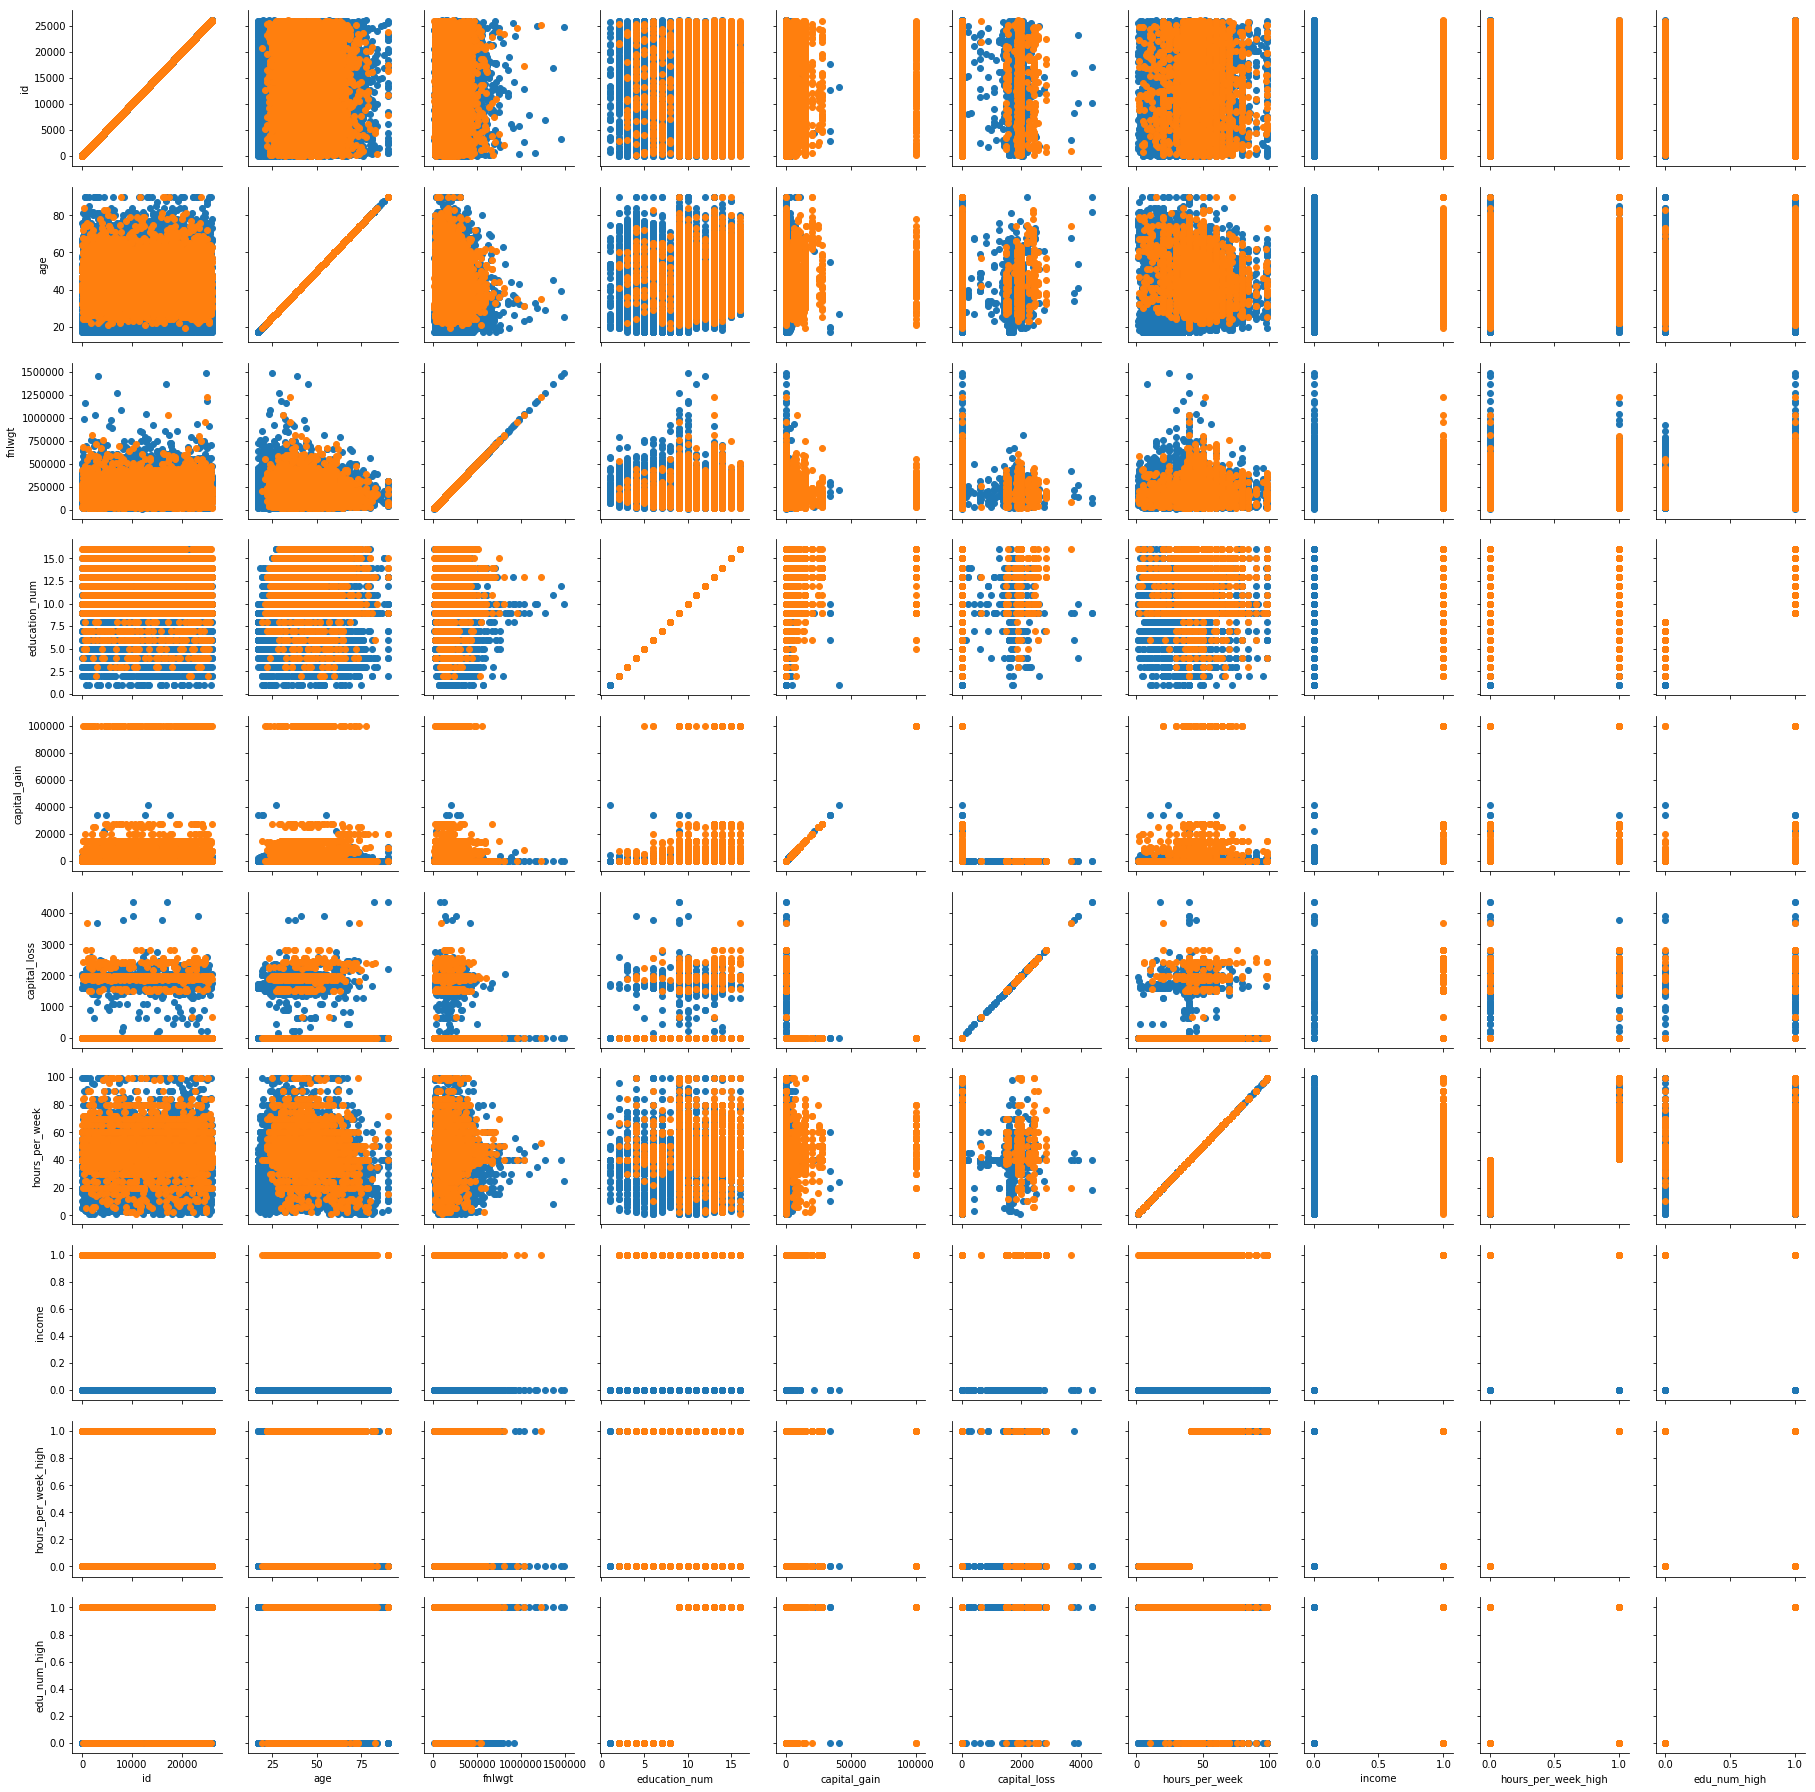

In [117]:
g=sns.PairGrid(data, hue="income")
g.map(plt.scatter)

## 범주형 데이터

In [15]:
import category_encoders as ce
import statsmodels.api as sm

In [123]:
# nominal = "named" data / ordinal = data with an order
#Nominal data is a group of non-parametric variables, while Ordinal data is a group of non-parametric ordered variables. 
#Although, they are both non-parametric variables, what differentiates them is the fact that ordinal data is placed into some kind of order by their position.
#For example, very hot, hot, cold, very cold, warm are all nominal data when considered individually. But when placed on a scale and arranged in a given order (very hot, hot, warm, cold, very cold), they are regarded as ordinal data.

In [ ]:
"""
#One-hot - 각 범주형 변수 값들을 0, 1로 매핑
#BinaryEncoding - onehot과 비슷하나 더 적은 메모리 차지 빠른속도
#LabelEncoding - n개 카테고리를 1~n으로 숫자를 부여, 순서가있는 데이터에 적합할듯 숫자들 사이에 관계 존재
#OrdinalEncoding - 순서형 자료에 적합
#Hashing - 범주형 변수들을 더 높은 차원으로 벡터화 
#Catboost(supervised) 

full-rank - 행렬의 모든 row, col이 독립. one-hot인코딩 방식으로 지정
reduced-rank - 특정한 하나의 범주값을 기준값(reference, baseline)으로 하고 기준값에 대응하는 더미변수의 가중치는 항상 1으로 놓는다. 다른 범주형 값을 가지는 경우는 기준값에 추가적인 특성이 있는 것으로 간주

데이터들은 모두 not null이지만 ?인 것들도 있음 
education_num 이 있는데 education이 굳이 필요할까?
"""



In [5]:
cat_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


### One-hot Encoding

In [12]:
# for col in cat_cols:
#     encoder = ce.OneHotEncoder(cols=col,handle_unknown='return_nan',return_df=True,use_cat_names=True)
#     data[col] = encoder.fit_transform(data[col]) 
temp = pd.get_dummies(data['occupation'])

In [13]:
print(temp)

       ?  Adm-clerical  Armed-Forces  Craft-repair  Exec-managerial  \
0      0             0             0             0                0   
1      0             0             0             0                0   
2      0             0             0             0                0   
3      0             0             0             0                0   
4      0             1             0             0                0   
5      0             0             0             1                0   
6      0             1             0             0                0   
7      0             0             0             0                0   
8      0             0             0             0                0   
9      0             0             0             0                0   
10     0             0             0             1                0   
11     1             0             0             0                0   
12     0             0             0             0                0   
13    

In [16]:
data['intercept'] = 1
data_new = data.join(temp)
sm.OLS(data['income'], data_new[['?', 'Adm-clerical',  'Armed-Forces',  'Craft-repair',  'Exec-managerial', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     311.2
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:41:59   Log-Likelihood:                -14120.
No. Observations:               26049   AIC:                         2.825e+04
Df Residuals:                   26043   BIC:                         2.830e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
?                  -0.1258      0.011    -11.194      0.000      -0.148      -0.104
Adm-clerical       -0.0925      0.008    -11.093      0.000      -0.109      -0.076
Armed-Forces       -0.2273      0.157     -1.445      0.149      -0.536       0.081
Craft-repair       -0.0010      0.008     -0.129      0.897      -0.017       0.015
Exec-managerial     0.2635      0.008     32.717      0.000       0.248       0.279
intercept           0.2273      0.003     66.991      0.000       0.221       0.234
==============================================================================
Omnibus:                     3952.821   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5758.915
Skew:                           1.136   Prob(JB):                         0.00
Kurtosis:                       2.626   Cond. No.                         62.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""